In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split # from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LinearRegression


D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# from sklearn.linear_model.coordinate_descent import ConvergenceWarning
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import warnings

In [6]:
# 数据导入
import os
os.chdir('E:\\Jupyterspace')

# 读取数据
datafile = 'acecopd.csv'
data = pd.read_csv(datafile,encoding= 'gbk')


In [19]:
data.head()

,pati_id,pati_visit_id,sex_name,age,in_hosp_days,sbp,dbp,discharge_pass,wbc,pao2,...,k,cl,fev1,is_smorking,smork_year,smork_num,is_drinking,drink_year,drink_num,id
0,1415,2,男,82,6,150.0,76.0,1,1.0,NaN,...,NaN,NaN,0,是,60年,10支,NaN,NaN,NaN,1415-2
1,2180,1,男,59,9,130.0,70.0,1,NaN,NaN,...,NaN,NaN,0,是,30年,1-2,否,NaN,NaN,2180-1
2,9247,2,男,74,13,124.0,76.0,1,NaN,NaN,...,NaN,NaN,0,是,60年,10支,是,NaN,NaN,9247-2
3,9247,3,男,74,11,100.0,74.0,1,100.0,NaN,...,NaN,NaN,0,是,60年,10支,是,NaN,NaN,9247-3
4,9904,4,女,81,11,108.0,52.0,1,2.6,NaN,...,NaN,NaN,0,是,NaN,NaN,否,NaN,NaN,9904-4


In [18]:
# 添加个案标识 id
data['pati_visit_id'] = data['pati_visit_id'].astype('str')
data['pati_id'] = data['pati_id'].astype('str')
data['id'] = data['pati_id'].str.cat(data['pati_visit_id'],sep='-')

In [37]:
# 添加分组变量
data['discharge_pass'] = data['discharge_pass'].astype('str')

In [38]:
import numpy as np
data.describe(include=['object'])

,pati_id,pati_visit_id,sex_name,discharge_pass,is_smorking,smork_year,smork_num,is_drinking,drink_year,drink_num,id
count,3429,3429,3429,3429,2906,2389,2280,3075,776,124,3429
unique,2451,59,2,6,3,55,73,3,30,27,3429
top,202601,1,男,1,戒,40年,20支,否,30年,2两,3560198-1
freq,18,1505,2520,3267,1757,630,965,2096,198,20,1


In [39]:
data.describe()

,age,in_hosp_days,sbp,dbp,wbc,pao2,paco2,na,k,cl,fev1
count,3429.000000,3429.000000,3196.000000,3196.000000,1892.000000,730.000000,730.00000,186.000000,186.000000,186.000000,3429.000000
mean,72.406533,12.034412,133.401752,75.878285,45.028753,82.722192,47.59000,136.126344,3.884839,102.110753,0.033829
std,9.990271,10.323416,18.655162,11.168669,344.645710,24.021509,15.92938,5.385476,0.572466,6.690259,0.180815
min,37.000000,0.000000,67.000000,20.000000,0.100000,36.100000,23.00000,114.000000,2.670000,75.200000,0.000000
25%,65.000000,8.000000,120.000000,70.000000,2.400000,67.400000,35.40000,134.100000,3.572500,98.725000,0.000000
50%,73.000000,10.000000,132.000000,77.000000,5.500000,77.300000,42.70000,136.700000,3.840000,102.500000,0.000000
75%,80.000000,14.000000,144.000000,82.000000,15.825000,93.300000,55.95000,139.200000,4.120000,106.000000,0.000000
max,96.000000,252.000000,218.000000,120.000000,11932.200000,200.900000,109.30000,156.700000,7.250000,130.800000,1.000000


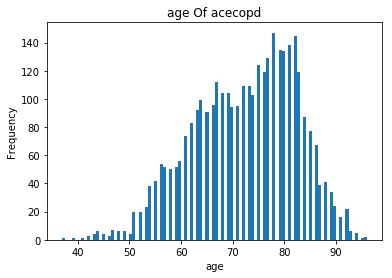

In [27]:
from matplotlib import pyplot as plt
#绘制直方图
def drawHist(heights):
    pyplot.hist(heights, 100)
    pyplot.xlabel('age')
    pyplot.ylabel('Frequency')
    pyplot.title('age Of acecopd')
    pyplot.show()
    
drawHist(data['age']) 
from matplotlib import pyplot as plt

In [36]:
import seaborn as sns

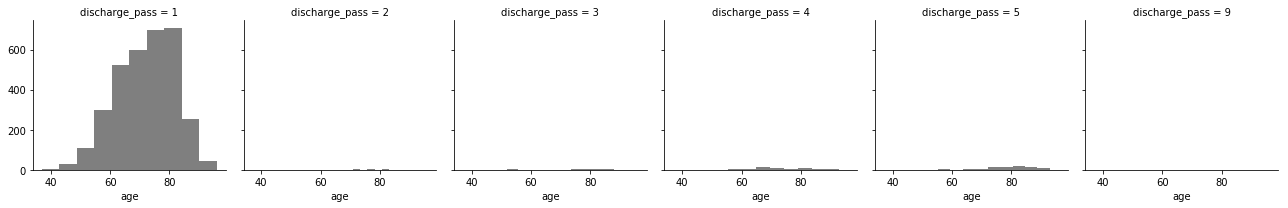

In [42]:
# 设置风格、尺度
# sns.set_style("ticks")
# sns.set_context("paper")

g = sns.FacetGrid(data, col="discharge_pass")
# 创建一个绘图表格区域，设置好row、col并分组
g.map(plt.hist, "age",alpha = 0.5,color = 'k',bins = 10)
# 以total_bill字段数据分别做直方图统计
# 添加图例

In [49]:
sns.set_style("darkgrid")
sns.set_context("paper")

sns.distplot(data['age'],bins = 10,hist = True,kde = False,norm_hist=False,
            rug = False,vertical = False,
            color = 'y',axlabel = 'age',hue='discharge_pass')

TypeError: distplot() got an unexpected keyword argument 'hue'